In [1]:
# to read old Matlab format
#from scipy.io import loadmat    
#feature_onse_3s = loadmat('data/feature_onset_3s.mat')

In [1]:
# v73 format is loaded by h5py
import h5py
import numpy as np

featureFilename = "data/feature_onset_3s.mat"
with h5py.File(featureFilename,'r') as hf:
    feature_cor = np.array(hf.get('new_cor_data_onset_3s'))
    print('Shape of the array feature_new_data = \n', feature_cor.shape)

    feature_incor = np.array(hf.get('old_cor_data_onset_3s'))
    print('Shape of the array feature_old_data = \n', feature_incor.shape)


Shape of the array feature_new_data = 
 (43, 1672)
Shape of the array feature_old_data = 
 (86, 1672)


Text(0,0.5,'count')

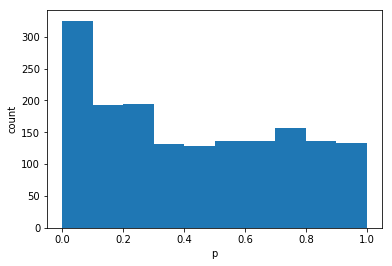

In [2]:
# Calculate the Wilcoxon rank sum test.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html

from scipy.stats import ranksums

numTrialCor, dimFeature = feature_cor.shape
numTrialIncor, dimFeature = feature_incor.shape

# for each channel*freq
pVal = list()
for i in range(dimFeature):
    T, p = ranksums(feature_cor[:,i], feature_incor[:,i])
    pVal.append(p)
    

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(pVal)
plt.xlabel('p')
plt.ylabel('count')

Text(0.5,0,'channel')

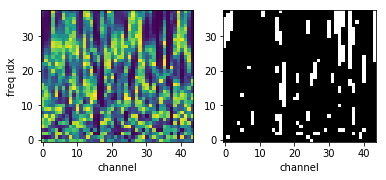

In [3]:
pVal2D = np.reshape(pVal, (38, 44))
idxSelectedFeature = pVal2D<0.05

plt.subplot(121)
plt.imshow(pVal2D)
plt.gca().invert_yaxis()
plt.xlabel('channel')
plt.ylabel('freq idx')
plt.subplot(122)
plt.imshow(idxSelectedFeature, cmap='gray')
plt.gca().invert_yaxis()
plt.xlabel('channel')

In [4]:
# print selected channels
Fs = [ 1,     2,     3,     4,     5,     6,     7,     8,     9,    10,    11,    12,    13,    15,
    17,    19,    21,    23,    25,    27,    29,    32,    36,    40,    44,    48,    52,    56,
    64,    68,    72,    76,    80,    84,    88,    92,    96,   100]

pTh = 0.05
#pTh = 0.1 # increase a bit 
#pTh = 0.15 # increase more

#plt.imshow(range(42),Fs, pVal2D)
listSelectedFeature = list()
for ch in range(44):
    for i in range(38):
        if pVal2D[i][ch] < pTh: #idxSelectedFeature[i,ch]:
            print("ch={}, freq={}".format(ch+1,Fs[i]))
            listSelectedFeature.append((ch+1,i))
np.savetxt("listSelectedFeature_p{}.txt".format(pTh), listSelectedFeature)
print(listSelectedFeature)
print(len(listSelectedFeature))

ch=1, freq=56
ch=1, freq=64
ch=1, freq=68
ch=1, freq=72
ch=1, freq=76
ch=1, freq=80
ch=1, freq=84
ch=1, freq=88
ch=1, freq=92
ch=2, freq=2
ch=2, freq=68
ch=2, freq=72
ch=2, freq=76
ch=2, freq=80
ch=2, freq=84
ch=2, freq=88
ch=2, freq=92
ch=2, freq=96
ch=3, freq=80
ch=3, freq=84
ch=3, freq=88
ch=3, freq=92
ch=3, freq=96
ch=3, freq=100
ch=5, freq=6
ch=6, freq=4
ch=6, freq=15
ch=8, freq=32
ch=9, freq=6
ch=9, freq=7
ch=9, freq=8
ch=9, freq=9
ch=12, freq=96
ch=12, freq=100
ch=15, freq=4
ch=16, freq=3
ch=16, freq=7
ch=16, freq=8
ch=16, freq=29
ch=16, freq=32
ch=16, freq=68
ch=16, freq=72
ch=16, freq=76
ch=16, freq=80
ch=16, freq=84
ch=16, freq=88
ch=16, freq=92
ch=17, freq=3
ch=17, freq=4
ch=17, freq=5
ch=17, freq=6
ch=17, freq=7
ch=17, freq=8
ch=17, freq=13
ch=17, freq=15
ch=17, freq=17
ch=17, freq=19
ch=17, freq=21
ch=17, freq=64
ch=17, freq=68
ch=17, freq=72
ch=17, freq=76
ch=17, freq=100
ch=18, freq=11
ch=18, freq=12
ch=18, freq=13
ch=18, freq=15
ch=18, freq=17
ch=18, freq=19
ch=18, freq

In [5]:
# Now, select features 
idx=np.array(pVal)<pTh
selected_feature_cor = feature_cor[:,idx]
selected_feature_incor = feature_incor[:,idx]

In [6]:
print(selected_feature_cor.shape)
print(selected_feature_incor.shape)

(43, 215)
(86, 215)


In [7]:
# let's standardize data
X = np.concatenate((selected_feature_cor, selected_feature_incor),axis=0)
Y = np.append(np.ones(numTrialCor),-np.ones(numTrialIncor))

from sklearn import preprocessing
# http://scikit-learn.org/stable/modules/preprocessing.html
X_scaled = preprocessing.scale(X)

print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

[-2.51306297e-16 -3.44255201e-16  1.05944538e-15  1.70750580e-15
 -5.43923218e-16 -3.02944577e-16  2.96059473e-16  6.47199779e-16
 -8.46867796e-16  1.67308028e-15  1.61799945e-16 -8.26212483e-16
  3.58025409e-15 -1.85037171e-15  7.07444439e-16 -1.63176965e-15
 -4.54416866e-16  9.22603940e-16  8.81293316e-16  1.04653581e-15
  9.22603940e-16  1.94159934e-15 -3.95893482e-16  2.19634819e-15
 -1.32193997e-15 -7.57361443e-17 -2.39601620e-15  1.42865909e-16
 -1.22554852e-15 -1.85897809e-16 -4.68187074e-16  1.44587185e-15
  4.94006214e-16 -2.82289265e-15  7.02280611e-16 -3.35993077e-15
  5.37038114e-16  1.51472289e-16 -2.91239900e-15  1.15669748e-15
 -2.60256932e-15 -1.27374425e-16  2.76092672e-15  1.25997404e-15
  6.19229044e-16 -1.72127601e-16  9.36374148e-16  3.70074342e-16
  5.09497698e-16  1.48373992e-15 -2.34093537e-15 -6.21380639e-16
  1.43210164e-15 -2.76436927e-15 -4.79203240e-15 -2.09307162e-15
 -4.18614325e-15 -2.34437792e-15  2.34093537e-15 -2.72650120e-15
 -2.25831412e-15 -4.22745

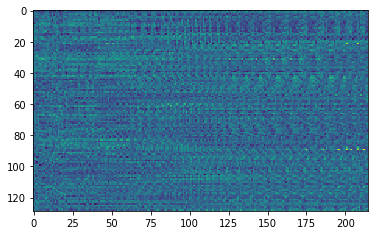

In [8]:
plt.imshow(X_scaled)

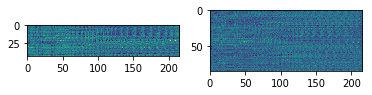

In [9]:
# compare mean
plt.subplot(121)
plt.imshow(X_scaled[Y>0,:])
plt.subplot(122)
plt.imshow(X_scaled[Y<0,:])

In [10]:
# save to a file
np.savetxt("WT_3s_X_p{}.txt".format(pTh),X)   # 44x45
np.savetxt("WT_3s_X_scaled_p{}.txt".format(pTh),X_scaled)   # 44x45
np.savetxt("WT_3s_Y_p{}.txt".format(pTh), Y)         # 44x1

# copy these files to data/